In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2022/players.csv
/kaggle/input/nfl-big-data-bowl-2022/PFFScoutingData.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2019.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2020.csv
/kaggle/input/nfl-big-data-bowl-2022/games.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2018.csv
/kaggle/input/nfl-big-data-bowl-2022/plays.csv


# Reading in the data from the csv files.

In [5]:
df_gamedata=pd.read_csv('../input/nfl-big-data-bowl-2022/games.csv')
df_gamedata.head()

gameId  season  week    gameDate gameTimeEastern homeTeamAbbr  \
0  2018090600    2018     1  09/06/2018        20:20:00          PHI   
1  2018090900    2018     1  09/09/2018        13:00:00          BAL   
2  2018090901    2018     1  09/09/2018        13:00:00          CLE   
3  2018090902    2018     1  09/09/2018        13:00:00          IND   
4  2018090903    2018     1  09/09/2018        13:00:00          MIA   

  visitorTeamAbbr  
0             ATL  
1             BUF  
2             PIT  
3             CIN  
4             TEN

In [6]:
df_plays=pd.read_csv('../input/nfl-big-data-bowl-2022/plays.csv')
df_plays.head()

gameId  playId                                    playDescription  \
0  2018090600      37  J.Elliott kicks 65 yards from PHI 35 to end zo...   
1  2018090600     366  (9:20) C.Johnston punts 56 yards to ATL 36, Ce...   
2  2018090600     658  (5:03) M.Bryant 21 yard field goal is GOOD, Ce...   
3  2018090600     677  M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...   
4  2018090600     872  (:33) C.Johnston punts 65 yards to end zone, C...   

   quarter  down  yardsToGo possessionTeam specialTeamsPlayType  \
0        1     0          0            PHI              Kickoff   
1        1     4          4            PHI                 Punt   
2        1     4          3            ATL           Field Goal   
3        1     0          0            ATL              Kickoff   
4        1     4         18            PHI                 Punt   

  specialTeamsResult  kickerId  ... penaltyCodes  penaltyJerseyNumbers  \
0          Touchback   44966.0  ...          NaN                   NaN   
1             Return   45603.0  ...         UNSd                PHI 18   
2  Kick Attempt Good   27091.0  ...          NaN                   NaN   
3             Return   37267.0  ...          NaN                   NaN   
4          Touchback   45603.0  ...          NaN                   NaN   

  penaltyYards  preSnapHomeScore preSnapVisitorScore passResult kickLength  \
0          NaN                 0                   0        NaN       66.0   
1        -15.0                 0                   0        NaN       56.0   
2          NaN                 0                   0        NaN       21.0   
3          NaN                 0                   3        NaN       64.0   
4          NaN                 0                   3        NaN       65.0   

   kickReturnYardage  playResult  absoluteYardlineNumber  
0                NaN          40                      45  
1                5.0          36                      18  
2                NaN           0                      13  
3               30.0          34                      75  
4                NaN          45                      45  

[5 rows x 25 columns]

In [7]:
df_players=pd.read_csv('../input/nfl-big-data-bowl-2022/players.csv')
df_players.head()

nflId height  weight   birthDate       collegeName Position  \
0  42901    6-1     208  1992-07-25     James Madison       SS   
1  43501    6-0     220  1994-08-11  Central Michigan       FS   
2  43534    6-0     205  1993-06-02          Illinois       SS   
3  43535    6-1     235  1992-12-22            Temple      MLB   
4  44174    6-1     236  1993-02-22        Texas Tech      ILB   

         displayName  
0       Dean Marlowe  
1      Kavon Frazier  
2  Clayton Fejedelem  
3   Tyler Matakevich  
4       Sam Eguavoen

In [8]:
df_scouting=pd.read_csv('../input/nfl-big-data-bowl-2022/PFFScoutingData.csv')
df_scouting.head()

gameId  playId snapDetail  snapTime  operationTime  hangTime kickType  \
0  2018090600      37        NaN       NaN            NaN      3.85        D   
1  2018090600     366         OK      0.84           2.12      4.46        N   
2  2018090600     658        NaN       NaN            NaN       NaN      NaN   
3  2018090600     677        NaN       NaN            NaN      4.06        D   
4  2018090600     872         OK      0.84           2.00      4.35        N   

  kickDirectionIntended kickDirectionActual returnDirectionIntended  \
0                     R                   R                     NaN   
1                     C                   C                       C   
2                   NaN                 NaN                     NaN   
3                     R                   R                       C   
4                     C                   L                     NaN   

  returnDirectionActual missedTackler assistTackler tackler  \
0                   NaN           NaN           NaN     NaN   
1                     R        PHI 57           NaN  PHI 54   
2                   NaN           NaN           NaN     NaN   
3                     C        ATL 83        ATL 22  ATL 27   
4                   NaN           NaN           NaN     NaN   

  kickoffReturnFormation         gunners puntRushers specialTeamsSafeties  \
0                  8-0-2             NaN         NaN       PHI 23; PHI 27   
1                    NaN  PHI 18; PHI 29         NaN                  NaN   
2                    NaN             NaN         NaN               PHI 58   
3                  8-0-2             NaN         NaN       ATL 17; ATL 22   
4                    NaN  PHI 18; PHI 29      ATL 85               ATL 37   

                            vises kickContactType  
0                             NaN             NaN  
1  ATL 83; ATL 27; ATL 34; ATL 21              CC  
2                             NaN             NaN  
3                             NaN             NaN  
4          ATL 83; ATL 34; ATL 21              BF

# Reading in the tracking data for the year 2018.

### In this notebook,in general, I have worked upon data from the year 2018. However, the same could be done for the years 2019 and 2020.

In [9]:
df_t2018=pd.read_csv('../input/nfl-big-data-bowl-2022/tracking2018.csv')

In [10]:
df_t2018.head()

time      x      y     s     a   dis       o     dir  \
0  2018-12-30T21:25:32.200  41.32  29.45  4.36  1.33  0.43  130.42  128.44   
1  2018-12-30T21:25:32.300  41.68  29.17  4.59  1.24  0.45  128.59  127.81   
2  2018-12-30T21:25:32.400  42.05  28.88  4.74  0.99  0.47  124.47  128.15   
3  2018-12-30T21:25:32.500  42.43  28.59  4.87  0.71  0.48  126.02  127.35   
4  2018-12-30T21:25:32.600  42.84  28.31  4.96  0.79  0.50  131.71  124.75   

  event    nflId    displayName  jerseyNumber position  team  frameId  \
0  None  39470.0  Justin Tucker           9.0        K  home        1   
1  None  39470.0  Justin Tucker           9.0        K  home        2   
2  None  39470.0  Justin Tucker           9.0        K  home        3   
3  None  39470.0  Justin Tucker           9.0        K  home        4   
4  None  39470.0  Justin Tucker           9.0        K  home        5   

       gameId  playId playDirection  
0  2018123000      36         right  
1  2018123000      36         right  
2  2018123000      36         right  
3  2018123000      36         right  
4  2018123000      36         right

In [11]:
df_players.head()

nflId height  weight   birthDate       collegeName Position  \
0  42901    6-1     208  1992-07-25     James Madison       SS   
1  43501    6-0     220  1994-08-11  Central Michigan       FS   
2  43534    6-0     205  1993-06-02          Illinois       SS   
3  43535    6-1     235  1992-12-22            Temple      MLB   
4  44174    6-1     236  1993-02-22        Texas Tech      ILB   

         displayName  
0       Dean Marlowe  
1      Kavon Frazier  
2  Clayton Fejedelem  
3   Tyler Matakevich  
4       Sam Eguavoen

## Some info regarding the data types and the number of null-values we have in the game data file.

In [12]:
df_gamedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           764 non-null    int64 
 1   season           764 non-null    int64 
 2   week             764 non-null    int64 
 3   gameDate         764 non-null    object
 4   gameTimeEastern  764 non-null    object
 5   homeTeamAbbr     764 non-null    object
 6   visitorTeamAbbr  764 non-null    object
dtypes: int64(3), object(4)
memory usage: 41.9+ KB


## Play data regarding the specific game ID of 2018090600

In [13]:
df_plays[df_plays['gameId']==2018090600].head()

gameId  playId                                    playDescription  \
0  2018090600      37  J.Elliott kicks 65 yards from PHI 35 to end zo...   
1  2018090600     366  (9:20) C.Johnston punts 56 yards to ATL 36, Ce...   
2  2018090600     658  (5:03) M.Bryant 21 yard field goal is GOOD, Ce...   
3  2018090600     677  M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...   
4  2018090600     872  (:33) C.Johnston punts 65 yards to end zone, C...   

   quarter  down  yardsToGo possessionTeam specialTeamsPlayType  \
0        1     0          0            PHI              Kickoff   
1        1     4          4            PHI                 Punt   
2        1     4          3            ATL           Field Goal   
3        1     0          0            ATL              Kickoff   
4        1     4         18            PHI                 Punt   

  specialTeamsResult  kickerId  ... penaltyCodes  penaltyJerseyNumbers  \
0          Touchback   44966.0  ...          NaN                   NaN   
1             Return   45603.0  ...         UNSd                PHI 18   
2  Kick Attempt Good   27091.0  ...          NaN                   NaN   
3             Return   37267.0  ...          NaN                   NaN   
4          Touchback   45603.0  ...          NaN                   NaN   

  penaltyYards  preSnapHomeScore preSnapVisitorScore passResult kickLength  \
0          NaN                 0                   0        NaN       66.0   
1        -15.0                 0                   0        NaN       56.0   
2          NaN                 0                   0        NaN       21.0   
3          NaN                 0                   3        NaN       64.0   
4          NaN                 0                   3        NaN       65.0   

   kickReturnYardage  playResult  absoluteYardlineNumber  
0                NaN          40                      45  
1                5.0          36                      18  
2                NaN           0                      13  
3               30.0          34                      75  
4                NaN          45                      45  

[5 rows x 25 columns]

In [14]:
df_plays[df_plays['gameId']==2018090600][:1]['playDescription']

0    J.Elliott kicks 65 yards from PHI 35 to end zo...
Name: playDescription, dtype: object

## Displaying the 1st 5 rows of the tracking data of the year 2018

In [15]:
df_t2018.head()

time      x      y     s     a   dis       o     dir  \
0  2018-12-30T21:25:32.200  41.32  29.45  4.36  1.33  0.43  130.42  128.44   
1  2018-12-30T21:25:32.300  41.68  29.17  4.59  1.24  0.45  128.59  127.81   
2  2018-12-30T21:25:32.400  42.05  28.88  4.74  0.99  0.47  124.47  128.15   
3  2018-12-30T21:25:32.500  42.43  28.59  4.87  0.71  0.48  126.02  127.35   
4  2018-12-30T21:25:32.600  42.84  28.31  4.96  0.79  0.50  131.71  124.75   

  event    nflId    displayName  jerseyNumber position  team  frameId  \
0  None  39470.0  Justin Tucker           9.0        K  home        1   
1  None  39470.0  Justin Tucker           9.0        K  home        2   
2  None  39470.0  Justin Tucker           9.0        K  home        3   
3  None  39470.0  Justin Tucker           9.0        K  home        4   
4  None  39470.0  Justin Tucker           9.0        K  home        5   

       gameId  playId playDirection  
0  2018123000      36         right  
1  2018123000      36         right  
2  2018123000      36         right  
3  2018123000      36         right  
4  2018123000      36         right

In [16]:
df_t2018[df_t2018['displayName']=='Justin Tucker']

time      x      y     s     a   dis       o  \
0         2018-12-30T21:25:32.200  41.32  29.45  4.36  1.33  0.43  130.42   
1         2018-12-30T21:25:32.300  41.68  29.17  4.59  1.24  0.45  128.59   
2         2018-12-30T21:25:32.400  42.05  28.88  4.74  0.99  0.47  124.47   
3         2018-12-30T21:25:32.500  42.43  28.59  4.87  0.71  0.48  126.02   
4         2018-12-30T21:25:32.600  42.84  28.31  4.96  0.79  0.50  131.71   
...                           ...    ...    ...   ...   ...   ...     ...   
12192946  2018-09-09T20:09:25.800  72.87  46.06  2.23  1.32  0.22  209.30   
12192947  2018-09-09T20:09:25.900  72.70  45.93  2.23  1.24  0.22  205.07   
12192948  2018-09-09T20:09:26.000  72.52  45.78  2.27  1.08  0.23  201.07   
12192949  2018-09-09T20:09:26.100  72.36  45.62  2.22  1.34  0.22  193.75   
12192950  2018-09-09T20:09:26.200  72.23  45.45  2.18  1.72  0.22  188.46   

             dir event    nflId    displayName  jerseyNumber position  team  \
0         128.44  None  39470.0  Justin Tucker           9.0        K  home   
1         127.81  None  39470.0  Justin Tucker           9.0        K  home   
2         128.15  None  39470.0  Justin Tucker           9.0        K  home   
3         127.35  None  39470.0  Justin Tucker           9.0        K  home   
4         124.75  None  39470.0  Justin Tucker           9.0        K  home   
...          ...   ...      ...            ...           ...      ...   ...   
12192946  236.12  None  39470.0  Justin Tucker           9.0        K  home   
12192947  232.14  None  39470.0  Justin Tucker           9.0        K  home   
12192948  229.45  None  39470.0  Justin Tucker           9.0        K  home   
12192949  223.36  None  39470.0  Justin Tucker           9.0        K  home   
12192950  216.78  None  39470.0  Justin Tucker           9.0        K  home   

          frameId      gameId  playId playDirection  
0               1  2018123000      36         right  
1               2  2018123000      36         right  
2               3  2018123000      36         right  
3               4  2018123000      36         right  
4               5  2018123000      36         right  
...           ...         ...     ...           ...  
12192946      140  2018090900    4236         right  
12192947      141  2018090900    4236         right  
12192948      142  2018090900    4236         right  
12192949      143  2018090900    4236         right  
12192950      144  2018090900    4236         right  

[11572 rows x 18 columns]

# Video output for ingame player movement

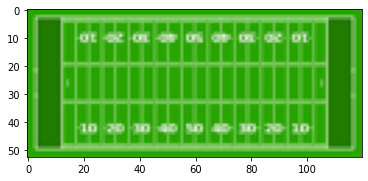

In [17]:
from PIL import Image
from skimage import io
f='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/AmFBfield.svg/1200px-AmFBfield.svg.png'
a = io.imread(f)
# determining the height ratio
# resize image and save
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
im = Image.fromarray(a)
im = im.resize((120,53))
plt.imshow(im)
im.save('sompic.png') # Saving the resized background image

In [18]:
t=df_t2018.loc[(df_t2018['time'].str.contains('2018-12-30',case=False))]

In [29]:
t.head(10)

time      x      y     s     a   dis       o     dir  \
0  2018-12-30T21:25:32.200  41.32  29.45  4.36  1.33  0.43  130.42  128.44   
1  2018-12-30T21:25:32.300  41.68  29.17  4.59  1.24  0.45  128.59  127.81   
2  2018-12-30T21:25:32.400  42.05  28.88  4.74  0.99  0.47  124.47  128.15   
3  2018-12-30T21:25:32.500  42.43  28.59  4.87  0.71  0.48  126.02  127.35   
4  2018-12-30T21:25:32.600  42.84  28.31  4.96  0.79  0.50  131.71  124.75   
5  2018-12-30T21:25:32.700  43.26  28.05  4.98  1.07  0.50  136.68  122.28   
6  2018-12-30T21:25:32.800  43.69  27.80  4.91  1.48  0.49  136.68  119.75   
7  2018-12-30T21:25:32.900  44.11  27.58  4.78  2.01  0.48  130.36  116.50   
8  2018-12-30T21:25:33.000  44.54  27.38  4.62  2.46  0.47  124.53  113.65   
9  2018-12-30T21:25:33.100  44.96  27.21  4.48  2.52  0.46  116.48  110.83   

     event    nflId    displayName  jerseyNumber position  team  frameId  \
0     None  39470.0  Justin Tucker           9.0        K  home        1   
1     None  39470.0  Justin Tucker           9.0        K  home        2   
2     None  39470.0  Justin Tucker           9.0        K  home        3   
3     None  39470.0  Justin Tucker           9.0        K  home        4   
4     None  39470.0  Justin Tucker           9.0        K  home        5   
5     None  39470.0  Justin Tucker           9.0        K  home        6   
6     None  39470.0  Justin Tucker           9.0        K  home        7   
7     None  39470.0  Justin Tucker           9.0        K  home        8   
8     None  39470.0  Justin Tucker           9.0        K  home        9   
9  kickoff  39470.0  Justin Tucker           9.0        K  home       10   

       gameId  playId playDirection  
0  2018123000      36         right  
1  2018123000      36         right  
2  2018123000      36         right  
3  2018123000      36         right  
4  2018123000      36         right  
5  2018123000      36         right  
6  2018123000      36         right  
7  2018123000      36         right  
8  2018123000      36         right  
9  2018123000      36         right

# A sample Image for a particular datetime value and a particular match id ingame

2018-12-30T21:25:32.300
27843
23


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


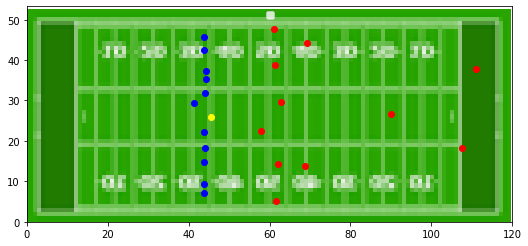

In [85]:
import time
from datetime import datetime, date, time, timedelta
t['time'][len(t)-1]
time_string = "2018-12-30 21:25:32.200"
format_string = "%Y-%m-%d %H:%M:%S.%f"

for i in range(100):
    date_object = datetime.strptime(time_string, format_string)
    date_object = date_object + timedelta(milliseconds=100)
    time_string=str(date_object)
    if '.' in time_string:
        time_string=time_string[:-3]
    else:
        time_string=time_string+'.000'
    final_string=time_string.split(' ')
    final_string=final_string[0]+'T'+final_string[1]
    print(final_string)
    break
print(len(t['time'].unique()))
z=t.loc[(t['time'].str.contains('2018-12-30T21:25:32.200')) & (t['gameId']==2018123000)]
z.index = range(len(z))
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
f='sompic.png'
a = io.imread(f)
#plt.imshow(a)
fig=plt.figure()
ax = fig.add_subplot(111)
a = io.imread(f)
print(len(z))
for i in range(len(z)):
    ax.imshow(a)
    if z[i:i+1]['team'][i]=='home': 
        ax.plot(z[i:i+1]['x'][i],z[i:i+1]['y'][i],'ro',color='blue')
    elif z[i:i+1]['team'][i]=='away':
        ax.plot(z[i:i+1]['x'][i],z[i:i+1]['y'][i],'ro',color='red')
    else:
        ax.plot(z[i:i+1]['x'][i],z[i:i+1]['y'][i],'ro',color='yellow')
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.axis('on')
leg = ax.legend(loc='upper center')
plt.show()

## Real in-game video analysis

## Here, I have provided video analysis of in-game footage of the players and the movement of the ball throughout the game. The ball is denoted by the yellow dot and the home team is denoted by the blue dots and the away team by red dots.
You can check the entire video out by downloading it after running the code from the /kaggle/working directory. Else, you could just (copy+paste) the following youtube link to view the video: https://youtu.be/boLcsod1toE

In [86]:
import time
from datetime import datetime, date, time, timedelta

In [87]:
time_string = "2018-12-30" #given this date 
game_id= 2018123000 #given this gameID

In [98]:
t=df_t2018.loc[(df_t2018['time'].str.contains('2018-12-30')) & (df_t2018['gameId']==2018123000)]

In [101]:
times=t['time'].unique()
print(len(times))
print(times)

2177
['2018-12-30T21:25:32.200' '2018-12-30T21:25:32.300'
 '2018-12-30T21:25:32.400' ... '2018-12-30T23:53:39.100'
 '2018-12-30T23:53:39.200' '2018-12-30T23:53:39.300']


In [110]:
from matplotlib.pyplot import plot, draw, show
import cv2
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
f='sompic.png'
img=[]
ct=0
for i in times:
    fig=plt.figure()
    ax = fig.add_subplot(111)
    a = io.imread(f)
    time_string = i
    time_string=time_string.split('T')
    time_string=time_string[0]+' '+time_string[1]
    format_string = "%Y-%m-%d %H:%M:%S.%f"
    z=t.loc[(t['time'].str.contains(i)) & (t['gameId']==game_id)]
    z.index = range(len(z))
    for i in range(len(z)):
        ax.imshow(a)
        if z[i:i+1]['team'][i]=='home':
            ax.plot(z[i:i+1]['x'][i],z[i:i+1]['y'][i],'ro',color='blue')
        elif z[i:i+1]['team'][i]=='away':
            ax.plot(z[i:i+1]['x'][i],z[i:i+1]['y'][i],'ro',color='red')
        else:
            ax.plot(z[i:i+1]['x'][i],z[i:i+1]['y'][i],'ro',color='yellow')
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.axis('on')
    leg = ax.legend(loc='upper center')
    plt.savefig('Img'+str(i)+'.png')
    img.append(cv2.imread('Img'+str(i)+'.png'))
    os.remove('Img'+str(i)+'.png')
    plt.close(fig)
    ct+=1
height,width,layers=img[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video=cv2.VideoWriter('video_match.mp4',fourcc,1,(width,height))
for j in range(0,ct):
    video.write(img[j]) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


In [112]:
import os
os.chdir(r'/kaggle/working')
from IPython.display import FileLink
FileLink('video_match.mp4')

/kaggle/working/video_match.mp4

# Video output for individual player movement during a specific game on a certain day

#### Here, I used a background I found online and resized it in order to help us better understand where the player might've been on the football pitch. At each instant in every graph, there are 2 arrows pointed in the angle of player motion and player orientation respectively. In every graph, the speed and accuracy along with the time is mentioned.

 The arrows essentially represent the tangent to a point on the circle whose length varies. Each plot is saved and read in as an image in an array which is later converted into a video where each frame is a graph at a particular instant of the required match and player on the specified day.

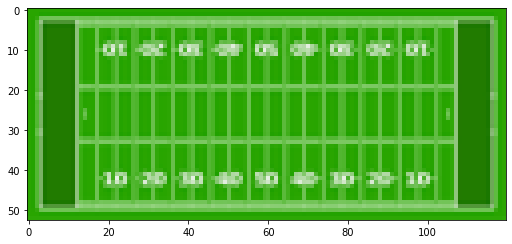

In [113]:
from PIL import Image
from skimage import io
f='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/AmFBfield.svg/1200px-AmFBfield.svg.png'
a = io.imread(f)
# determining the height ratio
# resize image and save
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
im = Image.fromarray(a)
im = im.resize((120,53))
plt.imshow(im)
im.save('sompic.png') # Saving the resized background image

## Just some sample data I have taken in this case. This could be implemented on any player in any year for any particular scouting agent that is looking for some player data and want to easily analyze the player movement on the pitch as per his/her needs.

In [114]:
t=df_t2018.loc[(df_t2018['time'].str.contains('2018-12-30',case=False)) & (df_t2018['displayName']=='Justin Tucker')]

In [115]:
t.index = range(851)

In [116]:
t[0:1]['time'][0]

'2018-12-30T21:25:32.200'

## Creating a function to create a graph of the player at every instant in the game and combine it in 1 video for easy analysis

In [117]:
from matplotlib.pyplot import plot, draw, show
import cv2
img=[]
def picperfect(df):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    f='sompic.png'
    a = io.imread(f)
    plt.imshow(a)
    for i in range(len(df)):
        fig=plt.figure()
        ax = fig.add_subplot(111)
        a = io.imread(f)
        ax.imshow(a)
        heading=df[i:i+1]['displayName'][i]+'s='+str(df[i:i+1]['s'][i])+' a='+str(df[i:i+1]['a'][i])+' Time='+ str(df[i:i+1]['time'][i])
        ax.plot(df[i:i+1]['x'][i],df[i:i+1]['y'][i],'ro',label=heading)
        ax.arrow(df[i:i+1]['x'][i],df[i:i+1]['y'][i],2,2*np.tan(np.pi*df[i:i+1]['o'][i]/180),head_width=1, head_length=2, color='blue')
        if df[i:i+1]['playDirection'][i]=='right':
            ax.arrow(10,10,2,2*np.tan(np.pi*0/180),head_width=1, head_length=2, color='yellow', label='Play_Direction='+'right')
        else:
            ax.arrow(10,10,2,2*np.tan(np.pi*0/180),head_width=1, head_length=2, color='yellow', label='Play_Direction='+'left')
        ax.arrow(df[i:i+1]['x'][i],df[i:i+1]['y'][i],2,2*np.tan(np.pi*df[i:i+1]['dir'][i]/180),head_width=1, head_length=2, color='red')
        ax.arrow(df[i:i+1]['x'][i],df[i:i+1]['y'][i],2,2*np.tan(np.pi*df[i:i+1]['o'][i]/180),head_width=0.05, head_length=0.1)
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 53.3)
        ax.axis('on')
        leg = ax.legend(loc='upper center')
        #plt.show()
        plt.savefig('Img'+str(i)+'.png')
        img.append(cv2.imread('Img'+str(i)+'.png'))
        os.remove('Img'+str(i)+'.png')
        plt.close(fig)
    height,width,layers=img[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
    video=cv2.VideoWriter('video.mp4',fourcc,1,(width,height))
    for j in range(0,len(df)):
        video.write(img[j])  # Saving all the images in a video of the '.mp4' format

## Using the picperfect() function to create a video of the player's movement

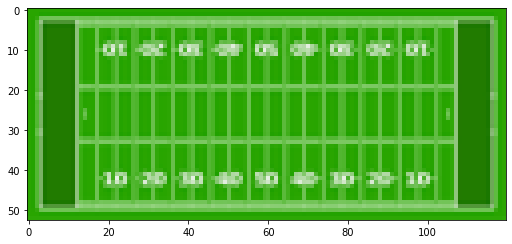

In [118]:
picperfect(t)

In [119]:
print(t[105:106]['displayName'][105])

Justin Tucker


## The video generated could be accessed through the link in the below cell. However, if that doesn't work, you could download it from the /kaggle/working directory after running the code. 
Or,you can just view it right here: https://youtu.be/x86Dtk0n3x0

In [120]:
#!pip install google.colab
#from google.colab import files
#files.download('../input/nfl-big-data-bowl-2022/games.csv')
import os
os.chdir(r'/kaggle/working')
from IPython.display import FileLink
FileLink('video.mp4')

/kaggle/working/video.mp4

# Some EDA on some useful/insightful data

## The Height distribution

In [121]:
df_players.head()

nflId height  weight   birthDate       collegeName Position  \
0  42901    6-1     208  1992-07-25     James Madison       SS   
1  43501    6-0     220  1994-08-11  Central Michigan       FS   
2  43534    6-0     205  1993-06-02          Illinois       SS   
3  43535    6-1     235  1992-12-22            Temple      MLB   
4  44174    6-1     236  1993-02-22        Texas Tech      ILB   

         displayName  
0       Dean Marlowe  
1      Kavon Frazier  
2  Clayton Fejedelem  
3   Tyler Matakevich  
4       Sam Eguavoen

In [122]:
check = df_players['height'].str.split('-', expand=True)
check.columns = ['first', 'second']
check.loc[(check['second'].notnull()), 'first'] = check[check['second'].notnull()]['first'].astype(np.int16) * 12 + check[check['second'].notnull()]['second'].astype(np.int16)
df_players['height'] = check['first']
df_players['height'] = df_players['height'].astype(np.float32)
df_players['height'] /= 12
df_players.head()

nflId    height  weight   birthDate       collegeName Position  \
0  42901  6.083333     208  1992-07-25     James Madison       SS   
1  43501  6.000000     220  1994-08-11  Central Michigan       FS   
2  43534  6.000000     205  1993-06-02          Illinois       SS   
3  43535  6.083333     235  1992-12-22            Temple      MLB   
4  44174  6.083333     236  1993-02-22        Texas Tech      ILB   

         displayName  
0       Dean Marlowe  
1      Kavon Frazier  
2  Clayton Fejedelem  
3   Tyler Matakevich  
4       Sam Eguavoen

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


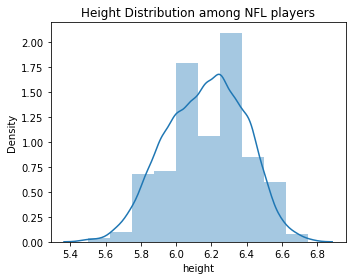

In [123]:
import seaborn as sns
plt.figure(figsize=(5, 4))

ax = sns.distplot(df_players['height'], bins=10)
ax.set_title('Height Distribution among NFL players');

## Weight distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


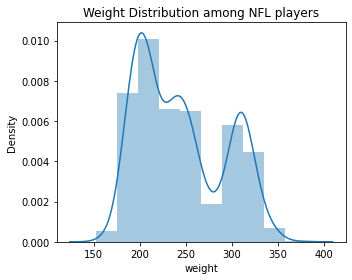

In [124]:
plt.figure(figsize=(5, 4))

ax = sns.distplot(df_players['weight'], bins=10)
ax.set_title('Weight Distribution among NFL players');

## Player birth year distribution

### This column has some null values. Hence, we shall get rid of that.

In [125]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nflId        2732 non-null   int64  
 1   height       2732 non-null   float32
 2   weight       2732 non-null   int64  
 3   birthDate    2715 non-null   object 
 4   collegeName  2724 non-null   object 
 5   Position     2732 non-null   object 
 6   displayName  2732 non-null   object 
dtypes: float32(1), int64(2), object(4)
memory usage: 138.9+ KB


In [126]:
df_players.dropna(subset=['birthDate'], inplace=True)

In [127]:
df_players['birthDate']

0       1992-07-25
1       1994-08-11
2       1993-06-02
3       1992-12-22
4       1993-02-22
           ...    
2727    06/16/1986
2728    05/02/1985
2729    06/16/1993
2730    1992-10-20
2731    12/14/1992
Name: birthDate, Length: 2715, dtype: object

In [128]:
for index, row in df_players.iterrows():
    if len(row['birthDate'].split('/'))>2: 
        df_players.loc[index, 'birthYear'] = row['birthDate'].split('/')[2]
    elif len(row['birthDate'].split('-'))>2: 
        df_players.loc[index, 'birthYear'] = row['birthDate'].split('-')[0]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


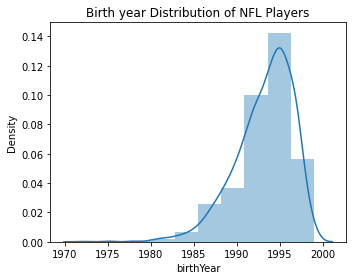

In [129]:
plt.figure(figsize=(5, 4))

ax = sns.distplot(df_players['birthYear'], bins=10)
ax.set_title('Birth year Distribution of NFL Players');

## Play Result Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


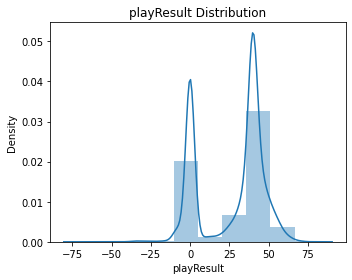

In [130]:
plt.figure(figsize=(5, 4))
ax = sns.distplot(df_plays['playResult'], bins=10);
ax.set_title('playResult Distribution'); 

## preSnap Home Score Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


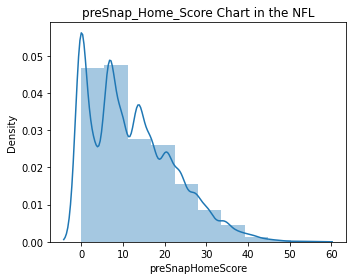

In [131]:
plt.figure(figsize=(5, 4))
ax = sns.distplot(df_plays['preSnapHomeScore'], bins=10);
ax.set_title('preSnap_Home_Score Chart in the NFL'); 

## preSnap Visitor Score Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


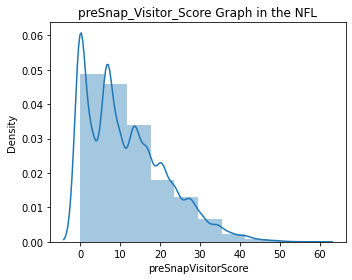

In [132]:
plt.figure(figsize=(5, 4))
ax = sns.distplot(df_plays['preSnapVisitorScore'], bins=10);
ax.set_title('preSnap_Visitor_Score Graph in the NFL'); 

## Some visualizations about Scouting data

In [133]:
df_scouting.head()

gameId  playId snapDetail  snapTime  operationTime  hangTime kickType  \
0  2018090600      37        NaN       NaN            NaN      3.85        D   
1  2018090600     366         OK      0.84           2.12      4.46        N   
2  2018090600     658        NaN       NaN            NaN       NaN      NaN   
3  2018090600     677        NaN       NaN            NaN      4.06        D   
4  2018090600     872         OK      0.84           2.00      4.35        N   

  kickDirectionIntended kickDirectionActual returnDirectionIntended  \
0                     R                   R                     NaN   
1                     C                   C                       C   
2                   NaN                 NaN                     NaN   
3                     R                   R                       C   
4                     C                   L                     NaN   

  returnDirectionActual missedTackler assistTackler tackler  \
0                   NaN           NaN           NaN     NaN   
1                     R        PHI 57           NaN  PHI 54   
2                   NaN           NaN           NaN     NaN   
3                     C        ATL 83        ATL 22  ATL 27   
4                   NaN           NaN           NaN     NaN   

  kickoffReturnFormation         gunners puntRushers specialTeamsSafeties  \
0                  8-0-2             NaN         NaN       PHI 23; PHI 27   
1                    NaN  PHI 18; PHI 29         NaN                  NaN   
2                    NaN             NaN         NaN               PHI 58   
3                  8-0-2             NaN         NaN       ATL 17; ATL 22   
4                    NaN  PHI 18; PHI 29      ATL 85               ATL 37   

                            vises kickContactType  
0                             NaN             NaN  
1  ATL 83; ATL 27; ATL 34; ATL 21              CC  
2                             NaN             NaN  
3                             NaN             NaN  
4          ATL 83; ATL 34; ATL 21              BF

In [134]:
df_scouting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   19979 non-null  int64  
 1   playId                   19979 non-null  int64  
 2   snapDetail               5919 non-null   object 
 3   snapTime                 5918 non-null   float64
 4   operationTime            5918 non-null   float64
 5   hangTime                 13098 non-null  float64
 6   kickType                 13723 non-null  object 
 7   kickDirectionIntended    13701 non-null  object 
 8   kickDirectionActual      13701 non-null  object 
 9   returnDirectionIntended  4754 non-null   object 
 10  returnDirectionActual    4756 non-null   object 
 11  missedTackler            1348 non-null   object 
 12  assistTackler            1034 non-null   object 
 13  tackler                  4759 non-null   object 
 14  kickoffReturnFormation

### The number of kicktypes and how frequently each one is implemented in the game

<AxesSubplot:>

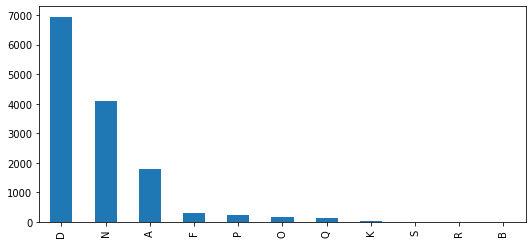

In [135]:
fig, ax = plt.subplots()
df_scouting['kickType'].value_counts().plot(ax=ax, kind='bar')

## I thought of implementing the pairplots here for data as they end up giving us very insightful observations into the dataset as a whole

### A pairplot of the scouting data with the hue as 'kicktype'

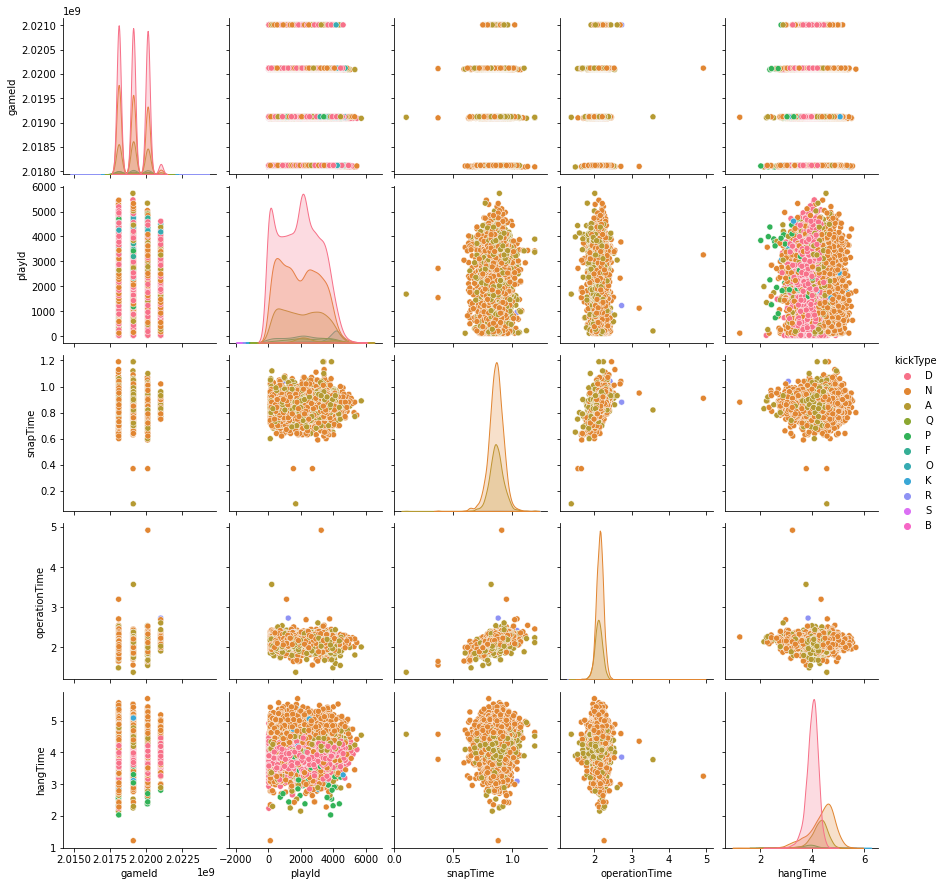

In [136]:
sns.pairplot(df_scouting, hue='kickType')

### Pairplot for the gamedata file with the home team abbreviation as the hue

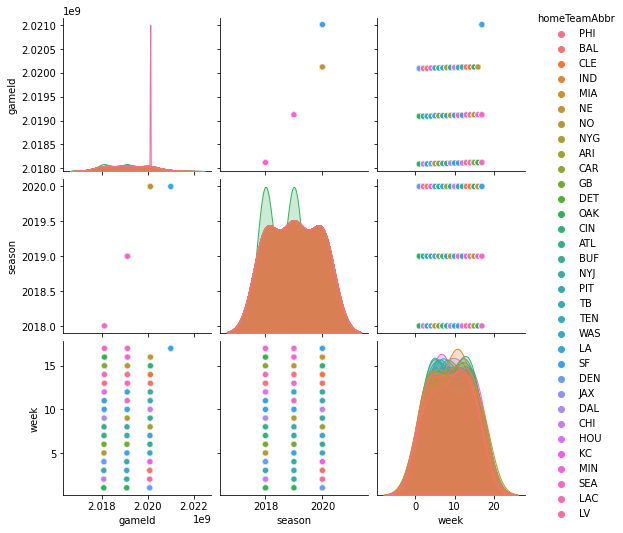

In [137]:
sns.pairplot(df_gamedata, hue='homeTeamAbbr')

### A pairplot for the gameplay information file with the hue as the quarter of the game

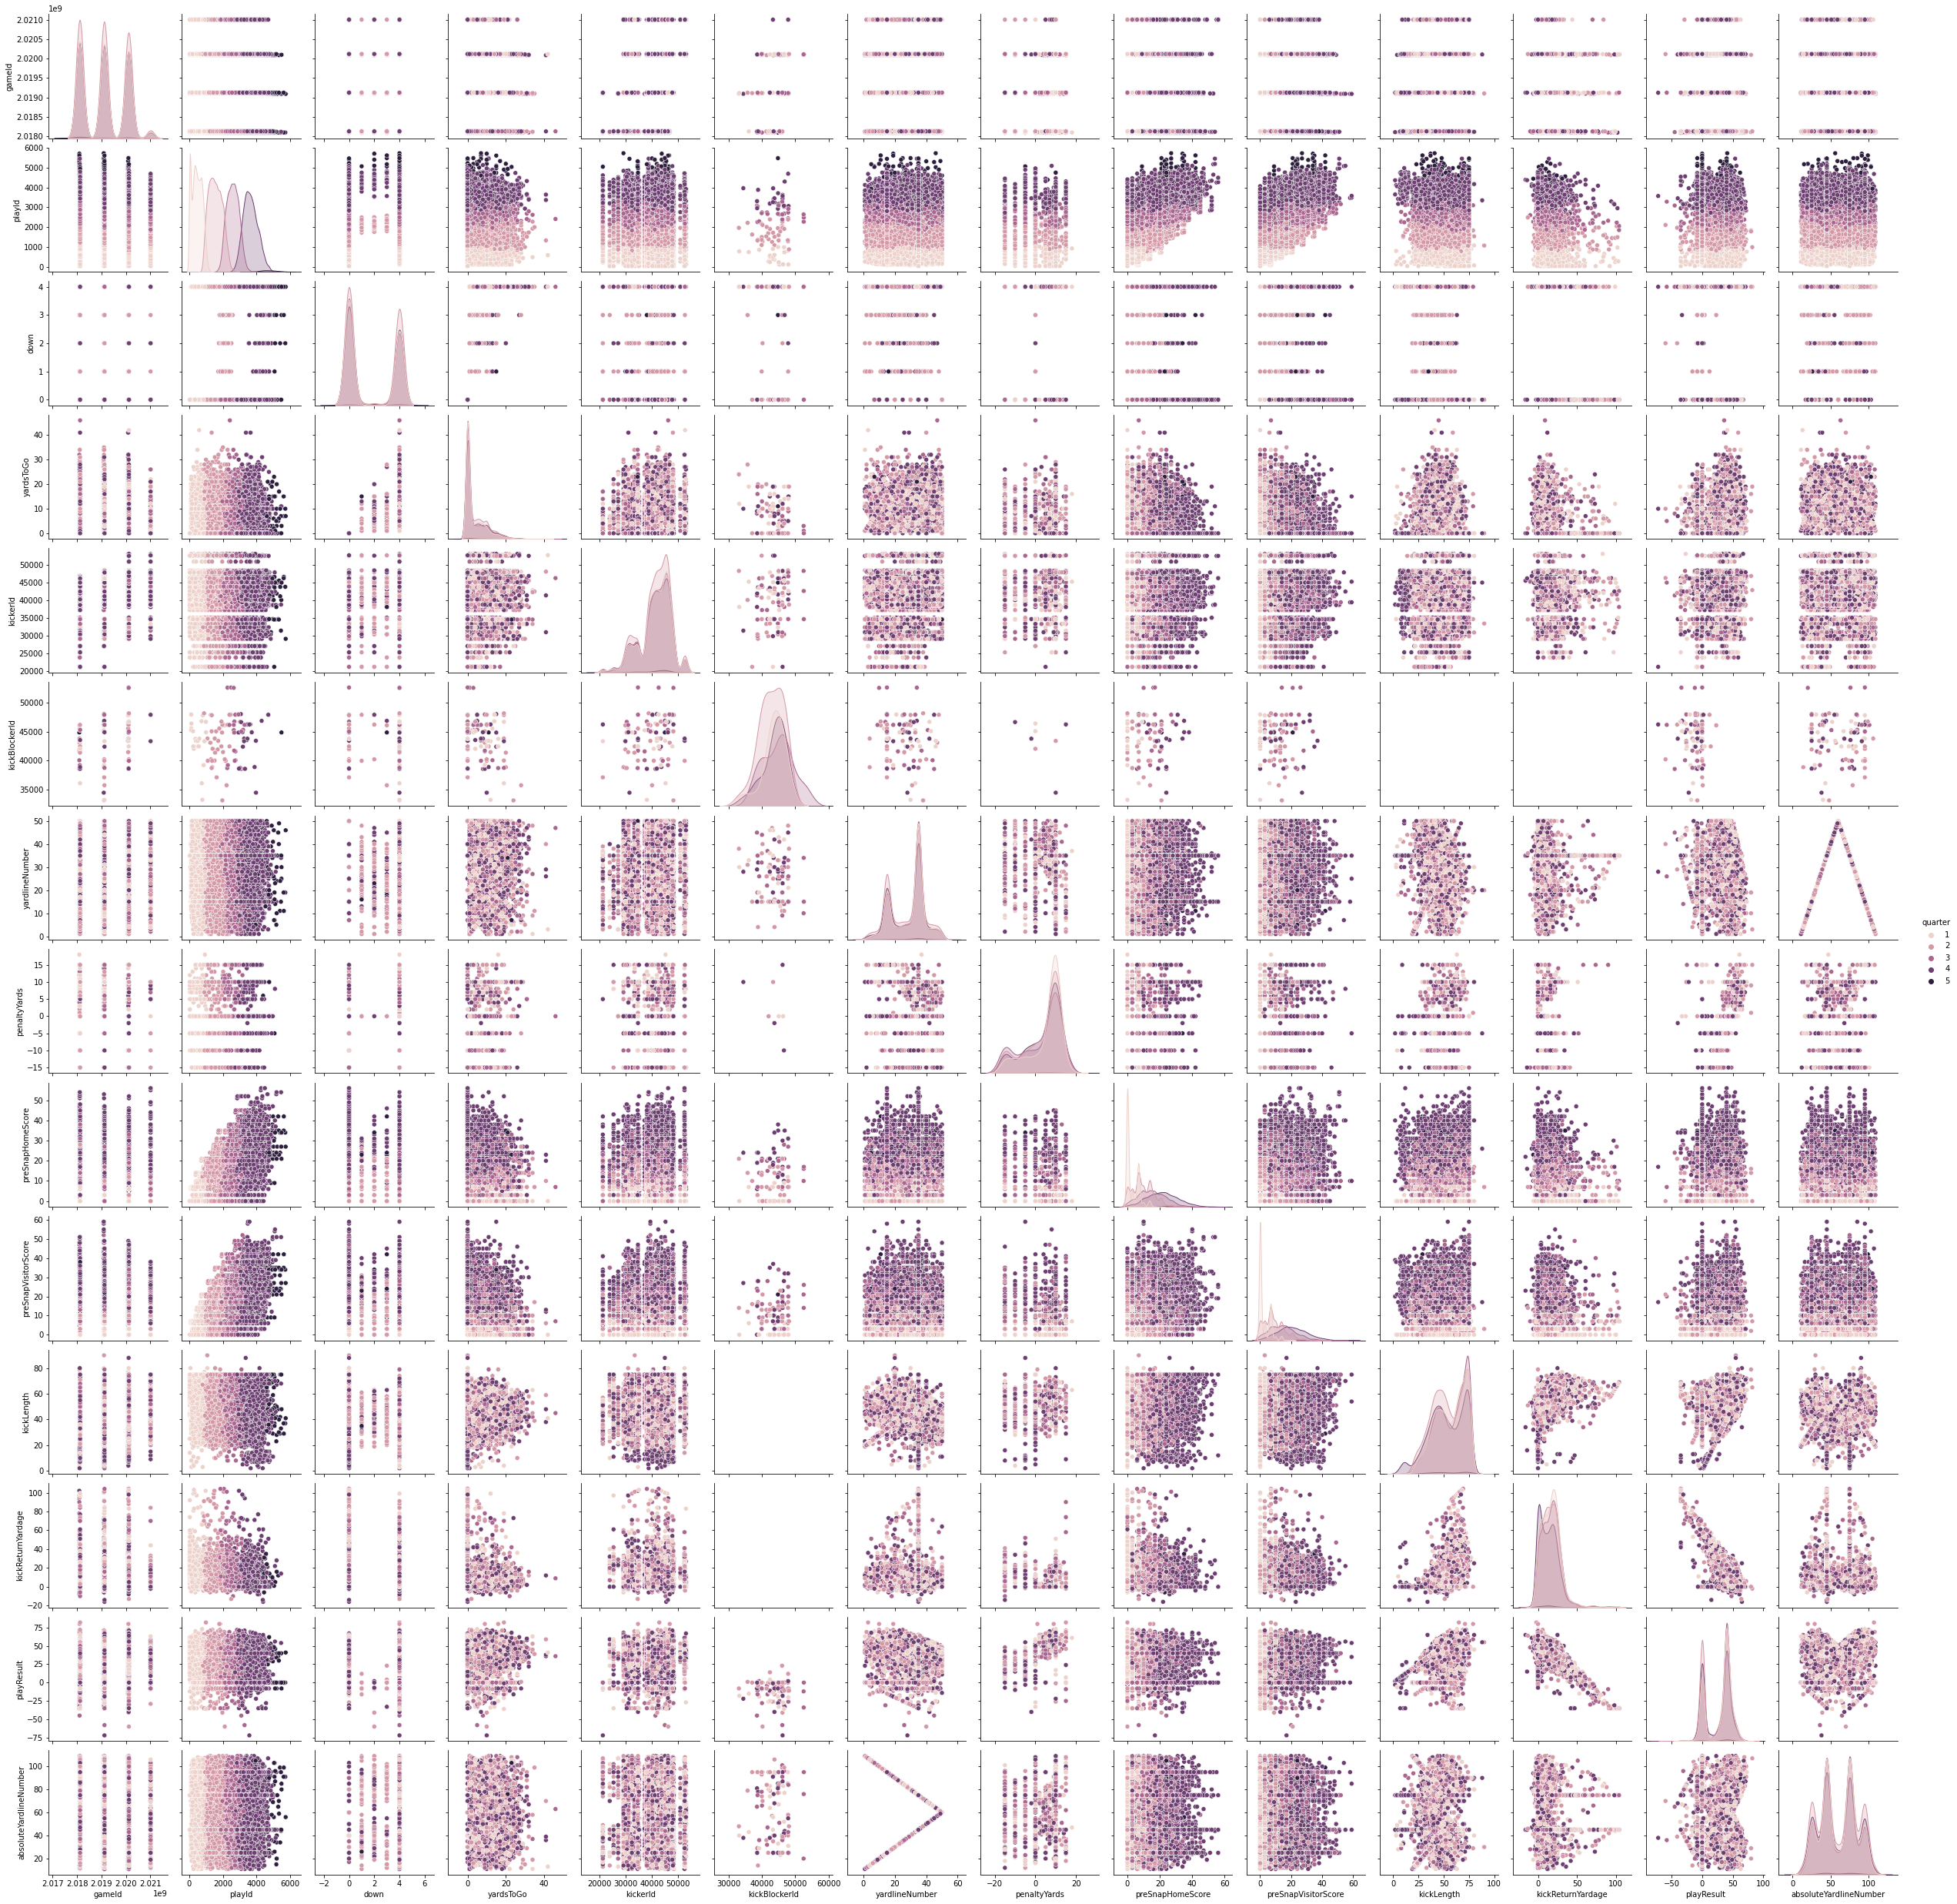

In [138]:
sns.pairplot(df_plays,hue='quarter')

# Violin Plots and Box Plots

## Here are some plots for comparing various parameters available in the datasets provided, such as kickLength, kickReturnYardage, hangTime, kickType, yardsToGo, etc.

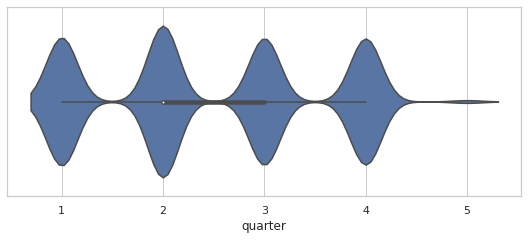

In [143]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df_plays['quarter'])

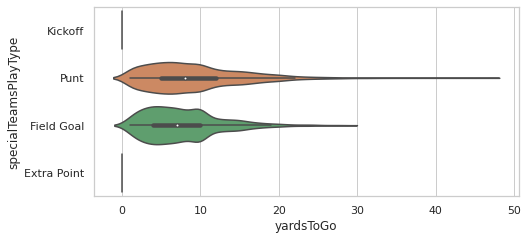

In [154]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df_plays['yardsToGo'],y=df_plays['specialTeamsPlayType'])

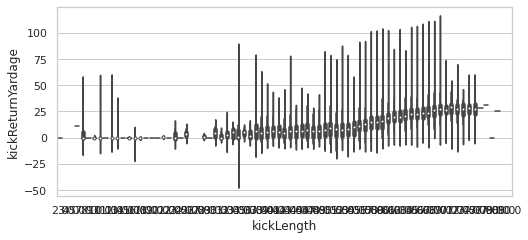

In [155]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df_plays['kickLength'],y=df_plays['kickReturnYardage'])

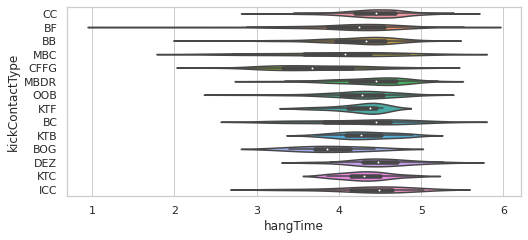

In [161]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df_scouting['hangTime'],y=df_scouting['kickContactType'])

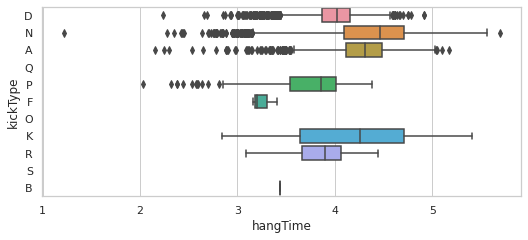

In [158]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_scouting["hangTime"], y=df_scouting["kickType"])

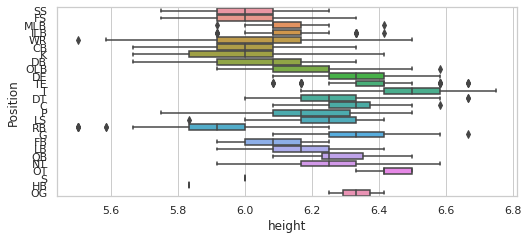

In [166]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_players["height"], y=df_players["Position"])

## Finally, this is a work in progess and I am working on it to make it better/ get any more meaningful outputs from the data provided. Thanks for viewing my work and please feel free to upvote it and let me know about what more could be worked upon.